<a href="https://colab.research.google.com/github/Areej73/Crime-Data-Analysis/blob/main/Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
# set random seed
SEED = 321
np.random.seed(SEED)
import holidays
import datetime as dt
from holidays import country_holidays

In [10]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
zip_file_path = '/content/drive/MyDrive/CodingDojo/06-AdvancedML/Week22/Data/Chicago_Crime_2001-2022.zip'
# Create an empty list to store DataFrames
dfs = []

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Iterate through files in the ZIP archive
    for file_name in zip_ref.namelist():
        # Check if the file is a CSV file and not the README
        if file_name.endswith('.csv') and not file_name.endswith('README.txt'):
            # Read the CSV file into a DataFrame
            with zip_ref.open(file_name) as file:
                df = pd.read_csv(file)
                # Append the DataFrame to the list
                dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Now you can work with the combined DataFrame 'df'
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [39]:
df.isna().sum()

,0
ID,0
Date,0
Primary Type,0
Description,0
Location Description,10928
Arrest,0
Domestic,0
Beat,0
District,47
Ward,614846


In [40]:
#drop the location lat and long info
df.drop(columns=['Latitude',	'Longitude'], inplace=True)

In [41]:
 # impute the missing values in the location description by the most frequent value grouped by the description
df['Location Description'].fillna(df.groupby('Description')['Location Description'].transform(lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else np.nan), inplace=True)

<ipython-input-41-66486dab0eca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location Description'].fillna(df.groupby('Description')['Location Description'].transform(lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else np.nan), inplace=True)


In [42]:
# impute the missig in district by a placeholder value
df['District'].fillna(-1, inplace=True)

<ipython-input-42-c15108c9f21f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['District'].fillna(-1, inplace=True)


In [43]:
#drop the  ID and ward column since it is irrelavent
df.drop(columns=['Ward'], inplace=True)

In [44]:
df.isna().sum().sum()

1

In [45]:
#change the datatype of date into datetime
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
# set the date column as index
df.set_index('Date', inplace=True)
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District
Date,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0


## Topic 1: Comparing Police Districts

In [47]:
#filter for 2022
data_2022 = df[df.index.year == 2022]

In [48]:
# Group by District and count crimes
district_crime_count = data_2022.groupby('District')['ID'].count()


In [49]:
# Identify the district with most and least crimes
most_crime_district = district_crime_count.idxmax()
least_crime_district = district_crime_count.idxmin()

print(f"District with the most crimes in 2022: {most_crime_district} ({district_crime_count[most_crime_district]} crimes)")
print(f"District with the least crimes in 2022: {least_crime_district} ({district_crime_count[least_crime_district]} crimes)")


District with the most crimes in 2022: 8.0 (14805 crimes)
District with the least crimes in 2022: 31.0 (15 crimes)


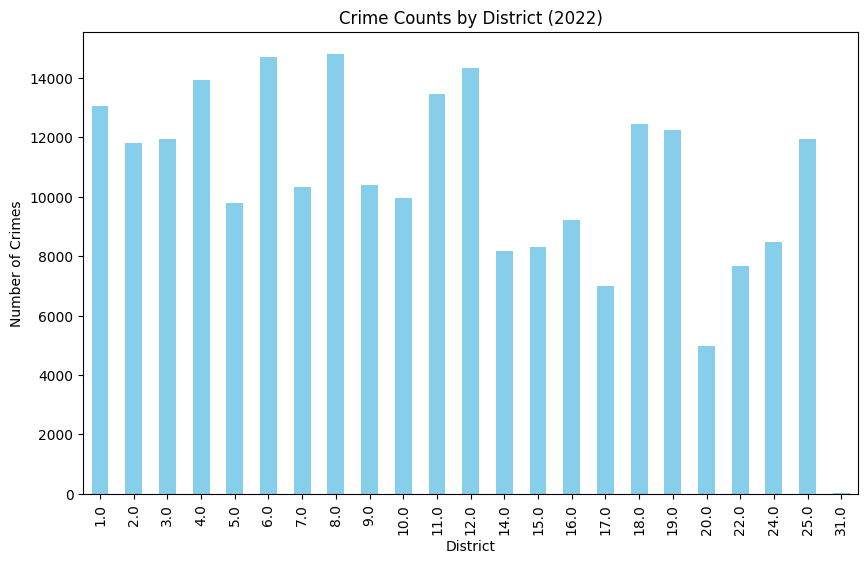

In [50]:
# Plot crime counts by district
plt.figure(figsize=(10, 6))
district_crime_count.sort_index().plot(kind='bar', color='skyblue')
plt.title("Crime Counts by District (2022)")
plt.xlabel("District")
plt.ylabel("Number of Crimes")
plt.show()

## Topic 2: Crimes Across the Years

In [53]:
# Extract year from 'Date'
df['Year'] = df.index.year


In [55]:
# Group by year and count crimes
yearly_crime_count = df.groupby('Year')['ID'].count()


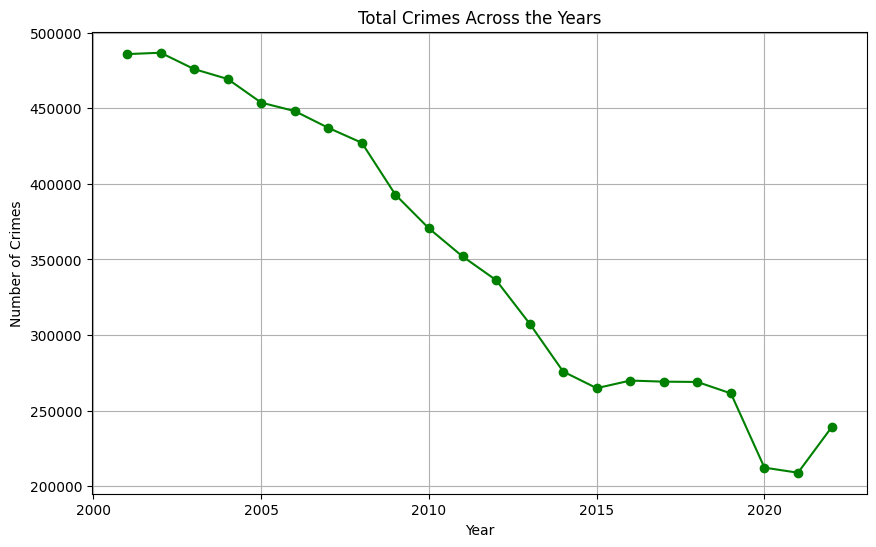

In [56]:
# Plot overall crime trend
plt.figure(figsize=(10, 6))
yearly_crime_count.plot(kind='line', marker='o', color='green')
plt.title("Total Crimes Across the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid()
plt.show()

In [58]:
# Analyze individual crimes
crime_trends = df.groupby(['Year', 'Primary Type'])['ID'].count().unstack(fill_value=0)

In [62]:
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958


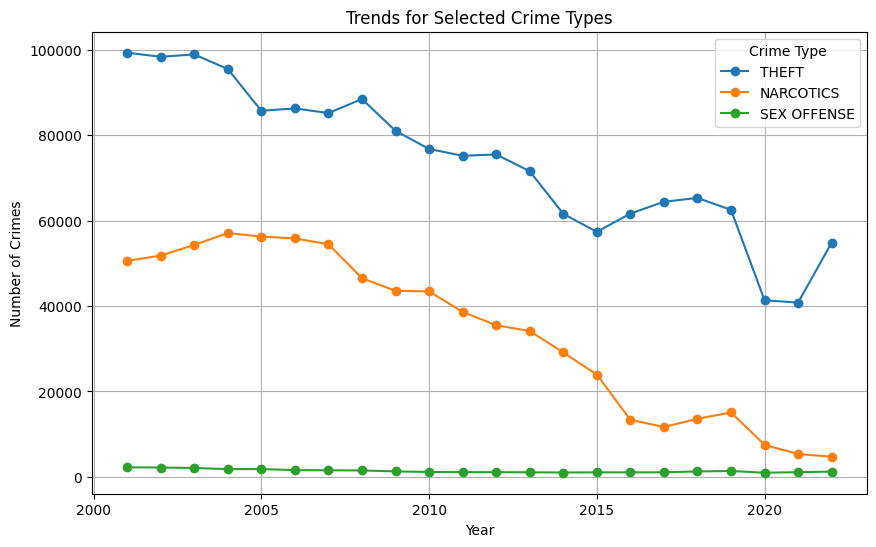

In [64]:
# Plot trends for selected primary types
selected_crimes = ['THEFT', 'NARCOTICS', 'SEX OFFENSE']  # Replace with crimes of interest
crime_trends[selected_crimes].plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Trends for Selected Crime Types")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.grid()
plt.show()

## Topic 4: Comparing Months


In [65]:
# Extract month from 'Date'
df['Month'] = df.index.month

In [67]:
 #Group by month and count crimes
monthly_crime_count = df.groupby('Month')['ID'].count()

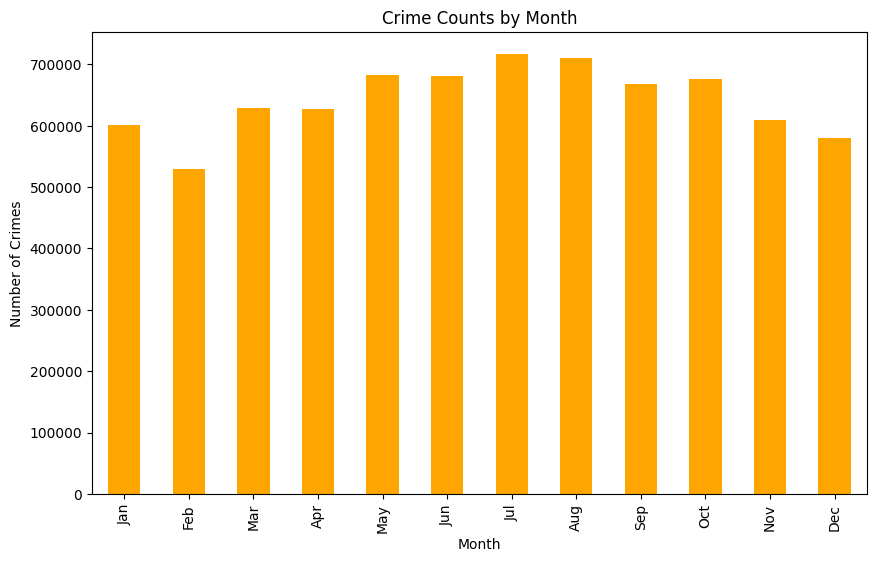

In [68]:
# Plot crime counts by month
plt.figure(figsize=(10, 6))
monthly_crime_count.plot(kind='bar', color='orange')
plt.title("Crime Counts by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [70]:
# Analyze individual crimes that don't follow the pattern
monthly_crime_types = df.groupby(['Month', 'Primary Type'])['ID'].count().unstack(fill_value=0)


In [71]:
# Calculate correlation with overall monthly trend
correlation = monthly_crime_types.corrwith(monthly_crime_count)
outliers = correlation[correlation.abs() < 0.3].index  # Threshold to identify outliers

In [72]:
print("Crimes that don't follow the overall monthly trend:")
print(outliers)

Crimes that don't follow the overall monthly trend:
Index(['DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'HUMAN TRAFFICKING',
       'NARCOTICS', 'NON - CRIMINAL', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'RITUALISM'],
      dtype='object', name='Primary Type')
